In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from statsmodels.graphics.tsaplots import plot_acf
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
def mort_rate_corr(rate_term):
    # RATE TERM: 0.5year, 1year, ..., 30year
    mort_df = pd.read_csv(f'./MORTGAGE{rate_term}US.csv', header = None, names = ['Date', 'rates'], parse_dates = True)
    mort_df['Date'] = pd.to_datetime(mort_df['Date'])
    vix_df = pd.read_csv('./vix-volatility-index-historical-chart.csv', header = None, names = ['Date', '$VIX'])
    vix_df['Date'] = pd.to_datetime(vix_df['Date'])
    
    scatter = pd.merge(mort_df, vix_df, how = 'inner', on = 'Date')

    scatter = scatter.set_index(["Date"])
    scatter = scatter.resample("M").mean() 
    scatter.index = pd.to_datetime(scatter.index, format="%Y%m").to_period('M')

    m_rates = scatter['rates'].pct_change()[1:]
    m_vix = scatter['$VIX'].pct_change()[1:]
    corr_coef = np.corrcoef(m_rates, m_vix)[0][1]
    return mort_df, vix_df, m_rates, m_vix, corr_coef

In [3]:
yield_df = pd.read_csv(f'./USTREASURY-YIELD.csv', parse_dates = True)
yield_df['Date'] = pd.to_datetime(yield_df['Date'])
vix_df = pd.read_csv('./vix-volatility-index-historical-chart.csv', header = None, names = ['Date', '$VIX'])
vix_df['Date'] = pd.to_datetime(vix_df['Date'])

yield_df

,Date,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
0,2022-10-18,3.25,3.70,4.04,4.39,4.50,4.43,4.43,4.21,4.12,4.01,4.27,4.04
1,2022-10-17,3.30,3.66,3.97,4.38,4.50,4.45,4.45,4.24,4.15,4.02,4.29,4.04
2,2022-10-14,3.30,3.61,3.81,4.31,4.50,4.48,4.47,4.25,4.15,4.00,4.26,3.99
3,2022-10-13,3.35,3.60,3.79,4.30,4.46,4.47,4.44,4.21,4.11,3.97,4.25,3.97
4,2022-10-12,3.07,3.45,3.70,4.16,4.28,4.28,4.29,4.12,4.03,3.91,4.18,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8202,1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
8203,1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
8204,1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
8205,1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04


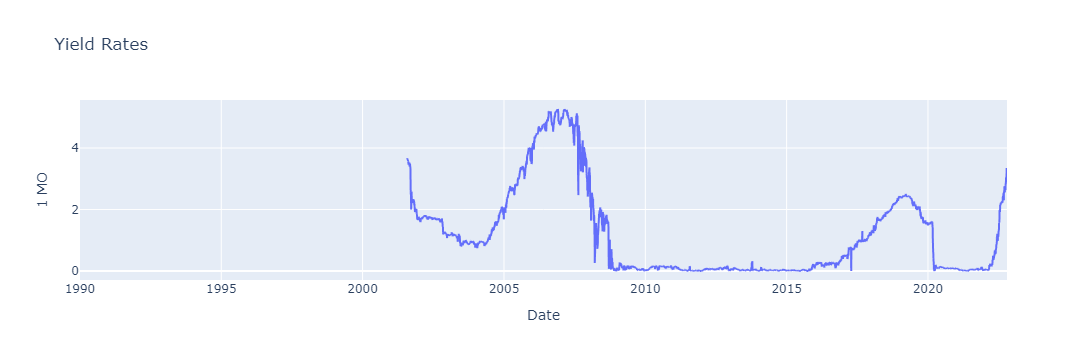

In [7]:
fig = px.line(yield_df, x="Date", y="1 MO", title='Yield Rates')

fig.show()